<a href="https://colab.research.google.com/github/2SEHI/Factory-Anomaly-Analysis/blob/main/3_Display_Sensor_Anomaly_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 본 소스를 실행할 때 필요한 파일
- right_columns.txt : right 컬럼명만 분류해 놓은 파일
- fact_data_vif.csv : 8145 rows × 179 columns (RIGHT, LEFT, CENTER 포함)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
from scipy import stats
import seaborn as sns
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Display_Sensor_Anomaly_Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
 
## colab용 글씨체 설정
plt.rc('font', family='NanumBarunGothic') 

## local jupyter 용 글씨체 설정
# font_path = 'C:\Windows\Fonts\malgun.TTF'
# font = font_manager.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42)

## DataFrame파일 호출
- fact_data_vif.csv : 8145 rows × 179 columns (RIGHT, LEFT, CENTER 포함)

In [ ]:
# working_dir = './data/'
working_dir = '/content/drive/MyDrive/Colab Notebooks/k-digital/[Project]Display_Sensor_Anomaly_Analysis/data/'
fact_data = pd.read_csv(working_dir + 'fact_data_vif.csv', index_col='dat...date.name.')
fact_data


## right 컬럼 제거

In [ ]:
my_file = open(working_dir + "right_columns.txt", "r", encoding='utf-8')
content = my_file. read()
# print(content)
right_columns = content. split(",\n")

cl_columns =[column for column in fact_data if column not in right_columns]
cl_columns

['X1WOS45106_PV',
 'X1WOS45107_PV',
 'X1WOS45109_PV',
 'DCS_Offset_RPM_M11.1WOS45111_PV',
 'DCS_Offset_RPM_M15.1WOS45115_PV',
 'DB.N2.SCREEN.FLOW.LEFT.1FI49011_PV',
 'N2.TO.EA1313A.1FI33503A_PV',
 'ROOF.HEATING.Zone.1.1JIC31101.PV',
 'ROOF.HEATING.Zone.2.1JIC31102.PV',
 'ROOF.HEATING.Zone.3.1JIC31103.PV',
 'ROOF.HEATING.Zone.4.1JIC31104.PV',
 'ATM.FLOW.SECT.9.N2.1FIC33415.PV',
 'Gross.width',
 'Left.edge',
 'LOWER.AB7.Z92.TMP.1TIC41751.PV',
 'UPPER.C2..Z175.TMP.1TIC42307.PV',
 'LIFT.OUT.ROL.MTR.M1.CUR.1WII40101.PV',
 'LIFT.OUT.ROL.MTR.M2.CUR.1WII40102.PV',
 'LEHR.DRV.MTR..M4.1.CUR.1WII40104.PV',
 'LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV',
 'LEHR.DRV.MTR..M7.1.CUR.1WII40110.PV',
 'LEHR.DRV.MTR..M7.2.CUR.1WII40111.PV',
 'LEHR.DRV.MTR..M8.1.CUR.1WII40112.PV',
 'LEHR.DRV.MTR..M8.2.CUR.1WII40113.PV',
 'LEHR.DRV.MTR..M10.2.CUR.1WII40117.PV',
 'LEHR.DRV.MTR..M11.1.CUR.1WII40118.PV',
 'LEHR.DRV.MTR..M12.1.CUR.1WII40120.PV',
 'LEHR.DRV.MTR..M13.1.CUR.1WII40122.PV',
 'LEHR.DRV.MTR..M15.1.CUR.1WII401

- right를 제외한 center와 left컬럼만 저장
    - fact_data_lc.csv : 왼쪽과 center의 컬럼만 저장된 csv파일

In [ ]:
fact_data_result = fact_data[cl_columns]
fact_data_result = fact_data_result.iloc[:,:-4]

In [ ]:
fact_data_result.to_csv(working_dir + 'fact_data_lc.csv')
len(fact_data_result.columns)

146

Text(0.5, 1.0, 'VIF계수로 컬럼 제거 후 - 컬럼 179개 ')

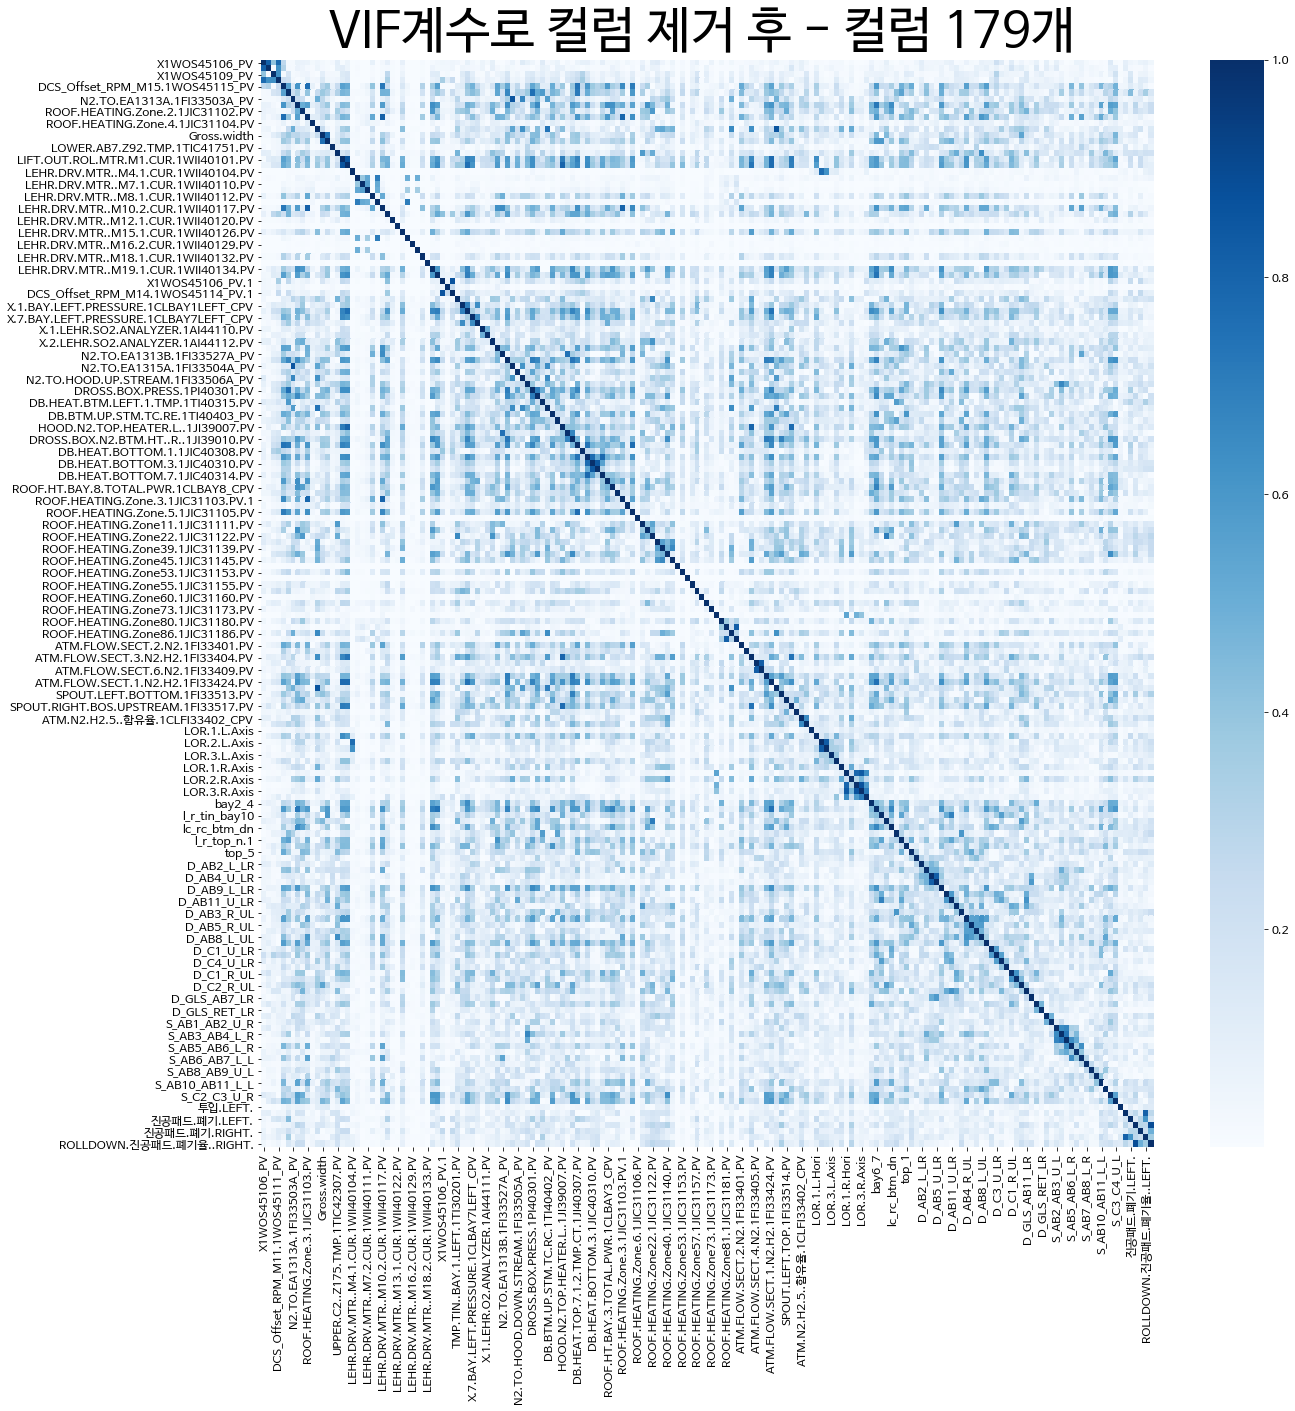

In [ ]:
corr  = abs(fact_data.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues').set_title("VIF계수로 컬럼 제거 후 - 컬럼 179개 ", fontsize=50)

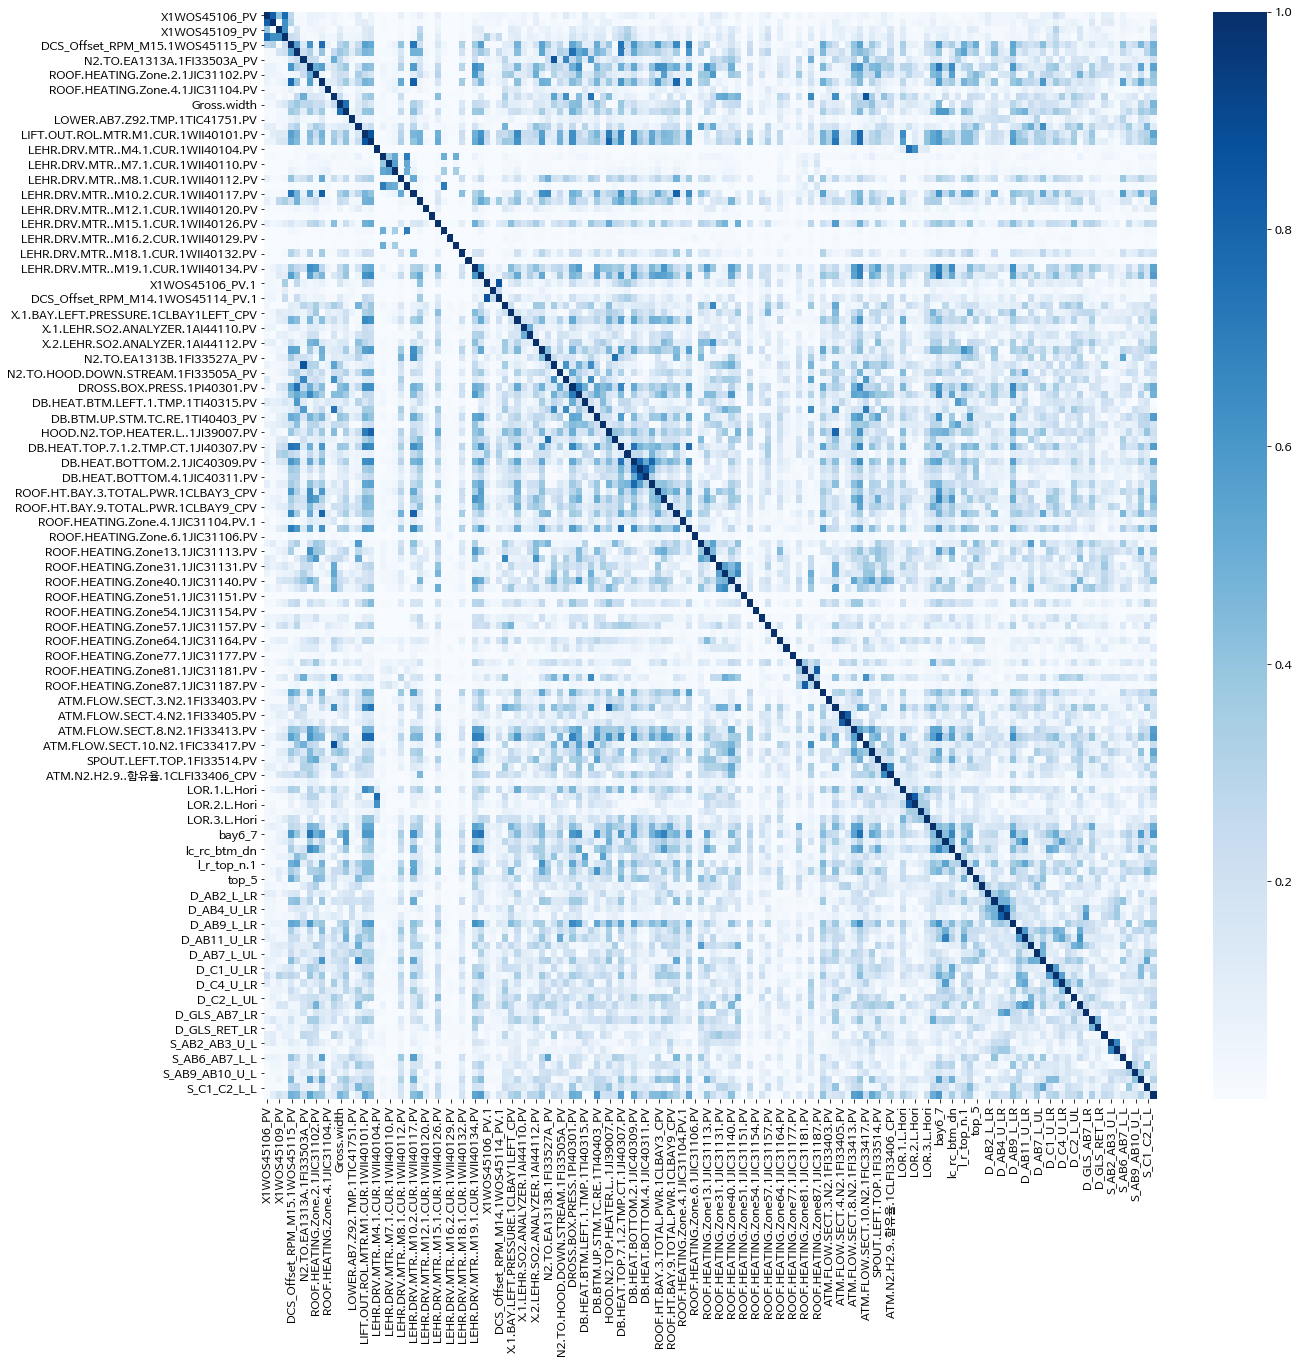

In [ ]:
corr  = abs(fact_data_result.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='Blues')

## LEFT레이블 불러오기

In [ ]:
fact_init_data = pd.read_csv(working_dir + 'factory_glass_2016.csv', encoding='cp949',index_col='dat...date.name.')
fact_init_data

## 레이블의 4분위수 구하기
- 레이블 마다 사분위수를 확인

In [ ]:
label_df = fact_init_data.iloc[:,-4:-2]
label_df
label_df.describe()

,L.RD,L.Vac
count,8145.000000,8145.000000
mean,0.018049,0.019174
std,0.045042,0.031836
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.009000,0.010000
75%,0.020000,0.022000
max,0.841000,0.400000


# 레이블의 boxplot


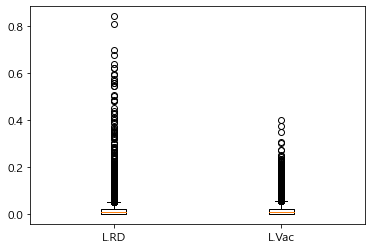

In [ ]:
plt.boxplot(label_df)
plt.xticks([1,2], list(label_df.columns))
plt.show()

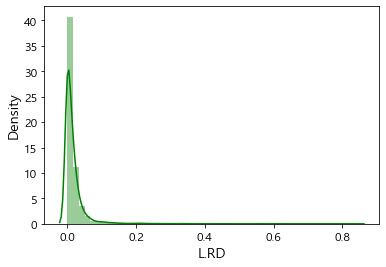

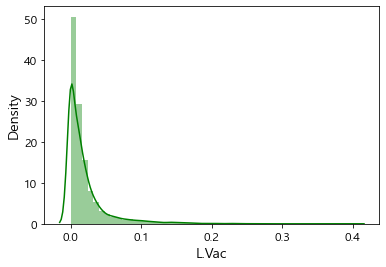

In [ ]:
for i in range(len(label_df.columns)) : 
    sns.distplot(label_df.iloc[:, i], color="green", label=label_df.columns[i])
    plt.show()

## 레이블에 대해 불량품(1)과 양품(0)으로 분류
- 1사분위에서 3사분위수사이는 양품, 이외는 불량품으로 labeling을 한다.


In [ ]:
label_df = fact_init_data.iloc[:,-4:-2]
label_df

# 1사분위
quartile_1 = label_df.quantile(q=0.25, interpolation='nearest')
# 3사분위
quartile_3 = label_df.quantile(q=0.75, interpolation='nearest')

for i in range(len(label_df.columns)) : 
    column_name = label_df.columns[i]

    # 컬럼명 생성
    new_col_name = []
    new_col_name.append('new_')
    new_col_name.append(column_name)
    new_col_name = ''.join(new_col_name)

    # 양품 데이터 설정
    label_df[new_col_name] = 0
    IQR = quartile_3[i] - quartile_1[i]
    condition = (label_df[column_name] < ( quartile_1[i] - 1.5 * IQR)) | (label_df[column_name] > (quartile_3[i] + 1.5 * IQR))
    # 불량품 레이블 데이터 설정
    label_df[new_col_name][condition] = 1

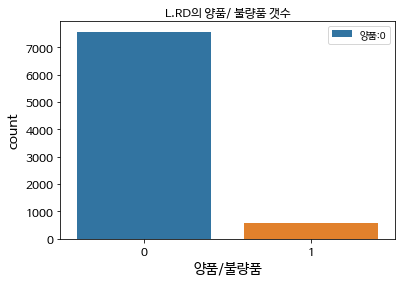

In [ ]:
# print('양품과 불량품의 분포확인 ' ,label_df['new_L.Vac'].value_counts())

ax = sns.countplot(x='new_L.RD', data=label_df)
ax.set_xlabel('양품/불량품')
plt.legend(['양품:0', '불량:1'])
plt.title("L.RD의 양품/ 불량품 갯수")
plt.show()

In [ ]:
ax = sns.countplot(x='new_L.RD', data=label_df)
ax.set_xlabel('양품/불량품')
plt.legend(['양품:0', '불량:1'])
plt.title("L.RD의 양품/ 불량품 갯수")
plt.show()

In [ ]:
new_str = 'new_L.RD'
label_df[new_str].value_counts()

0    7576
1     569
Name: new_L.RD, dtype: int64

# XGBoost모델

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
X_features = fact_data_result
y_labels = label_df['new_L.RD']
print(X_features.shape)

(8145, 146)


## 훈련데이터와 테스트데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, 
                                                   test_size=0.2, random_state=42)
#훈련 데이터 와 테스트 데이터 비율 확인
print(y_train.shape)
print(y_test.shape)


#원본 데이터 와의 비율을 확인 
#원본 데이터의 비율에 맞춰서 샘플링 하는 것을 층화 표본 추출이라고 합니다.

#훈련 데이터의 레이블 비율 확인
print(y_train.value_counts()/y_train.count())
#테스트 데이터의 레이블 비율 확인
print(y_test.value_counts()/y_test.count())

(6516,)
(1629,)
0    0.929405
1    0.070595
Name: new_L.RD, dtype: float64
0    0.933088
1    0.066912
Name: new_L.RD, dtype: float64


In [ ]:
xgb_clf.feature_importances_
# dir(xgb_clf)

array([0.00585731, 0.        , 0.        , 0.01069716, 0.        ,
       0.01635853, 0.01367314, 0.04545711, 0.        , 0.01438776,
       0.        , 0.        , 0.00507466, 0.00502161, 0.01412774,
       0.01534232, 0.00432764, 0.        , 0.        , 0.06079945,
       0.        , 0.        , 0.00538411, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00580922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00792558, 0.        , 0.        , 0.        , 0.00411797,
       0.00502199, 0.00514047, 0.00712083, 0.00398287, 0.00868015,
       0.00652066, 0.01147995, 0.01165017, 0.00687182, 0.0066103 ,
       0.00546179, 0.00655726, 0.03311674, 0.00492184, 0.01282425,
       0.00611203, 0.00508327, 0.00465269, 0.00798802, 0.00929159,
       0.        , 0.00775713, 0.00489839, 0.00347754, 0.00350237,
       0.01039512, 0.00730382, 0.00494945, 0.00576909, 0.        ,
       0.        , 0.01386451, 0.00300791, 0.00417814, 0.00589

[0]	validation_0-auc:0.773159
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.790877
[2]	validation_0-auc:0.798455
[3]	validation_0-auc:0.797344
[4]	validation_0-auc:0.833103
[5]	validation_0-auc:0.831739
[6]	validation_0-auc:0.837687
[7]	validation_0-auc:0.838043
[8]	validation_0-auc:0.83651
[9]	validation_0-auc:0.846508
[10]	validation_0-auc:0.847356
[11]	validation_0-auc:0.844622
[12]	validation_0-auc:0.8477
[13]	validation_0-auc:0.847187
[14]	validation_0-auc:0.850872
[15]	validation_0-auc:0.851476
[16]	validation_0-auc:0.858942
[17]	validation_0-auc:0.858646
[18]	validation_0-auc:0.859241
[19]	validation_0-auc:0.859953
[20]	validation_0-auc:0.86218
[21]	validation_0-auc:0.862793
[22]	validation_0-auc:0.86368
[23]	validation_0-auc:0.865877
[24]	validation_0-auc:0.866634
[25]	validation_0-auc:0.86735
[26]	validation_0-auc:0.868288
[27]	validation_0-auc:0.867486
[28]	validation_0-auc:0.868424
[29]	validation_0-auc:0.869335
[30]	validation_0-auc

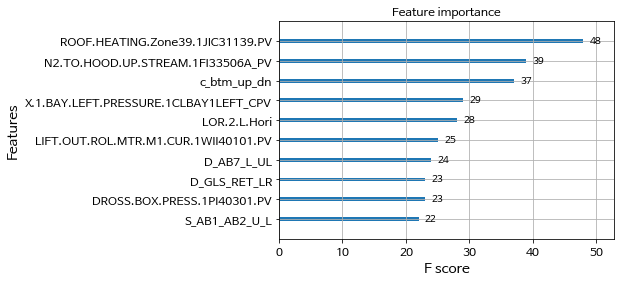

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
# 100번 이상 수행한 상태에서 roc_auc 가 더이상 좋아지지 않으면 훈련 중지
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
           eval_set=[(X_test, y_test)])


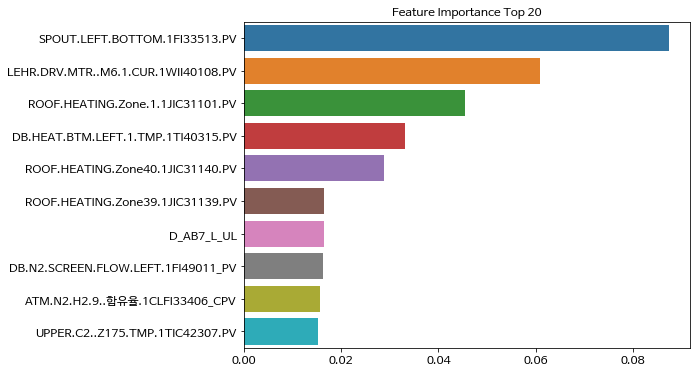

In [ ]:
ft_importance_values = xgb_clf.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:10]
ft_top20
# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [ ]:
ft_importance_values

array([0.00585731, 0.        , 0.        , 0.01069716, 0.        ,
       0.01635853, 0.01367314, 0.04545711, 0.        , 0.01438776,
       0.        , 0.        , 0.00507466, 0.00502161, 0.01412774,
       0.01534232, 0.00432764, 0.        , 0.        , 0.06079945,
       0.        , 0.        , 0.00538411, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00580922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00792558, 0.        , 0.        , 0.        , 0.00411797,
       0.00502199, 0.00514047, 0.00712083, 0.00398287, 0.00868015,
       0.00652066, 0.01147995, 0.01165017, 0.00687182, 0.0066103 ,
       0.00546179, 0.00655726, 0.03311674, 0.00492184, 0.01282425,
       0.00611203, 0.00508327, 0.00465269, 0.00798802, 0.00929159,
       0.        , 0.00775713, 0.00489839, 0.00347754, 0.00350237,
       0.01039512, 0.00730382, 0.00494945, 0.00576909, 0.        ,
       0.        , 0.01386451, 0.00300791, 0.00417814, 0.00589

In [ ]:
top_5_df

array([[0.15417124, 0.50368953, 0.88888889, 0.65721455, 0.7564343 ],
       [0.16004105, 0.50368953, 0.88888889, 0.6590468 , 0.74668373],
       [0.15982944, 0.50368953, 0.88888889, 0.67817434, 0.75993078],
       ...,
       [0.50642575, 0.50368953, 1.        , 1.        , 0.82792787],
       [0.49589965, 0.50368953, 1.        , 0.99383443, 0.84278802],
       [0.49127275, 0.50368953, 1.        , 0.9868387 , 0.83833178]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
importance_feature_5 = list(ft_top20[:5].index)
top_5_df = pd.DataFrame(data=fact_data_result, columns=importance_feature_5, index=fact_data_result.index)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(top_5_df)
top_5_df = pd.DataFrame(data=scaled, columns=importance_feature_5, index=fact_data_result.index)
top_5_df['target'] = label_df['new_L.RD']
top_5_df.head(3)

,SPOUT.LEFT.BOTTOM.1FI33513.PV,LEHR.DRV.MTR..M6.1.CUR.1WII40108.PV,ROOF.HEATING.Zone.1.1JIC31101.PV,DB.HEAT.BTM.LEFT.1.TMP.1TI40315.PV,ROOF.HEATING.Zone40.1JIC31140.PV,target
dat...date.name.,,,,,,
2016-01-01 07,0.154171,0.50369,0.888889,0.657215,0.756434,0
2016-01-01 08,0.160041,0.50369,0.888889,0.659047,0.746684,0
2016-01-01 09,0.159829,0.50369,0.888889,0.678174,0.759931,0


In [ ]:
top_5_df['target'].unique()[0]

0

No handles with labels found to put in legend.


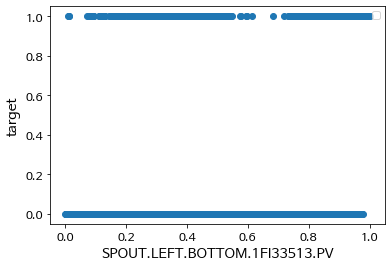

In [ ]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = top_5_df[top_5_df['target']==i]['SPOUT.LEFT.BOTTOM.1FI33513.PV']
    y_axis_data = top_5_df[top_5_df['target']==i]['DB.HEAT.BTM.LEFT.1.TMP.1TI40315.PV']
    label_name =''
    if i == 0 :
        label_name ='양품'
    elif i == 1 :
        label_name = '불량품'
plt.scatter(top_5_df['SPOUT.LEFT.BOTTOM.1FI33513.PV'], top_5_df['target'])
plt.legend()

plt.xlabel('SPOUT.LEFT.BOTTOM.1FI33513.PV')
plt.ylabel('target')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(fact_5)
pca = PCA()
pca.fit(df_scaled)

# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(fact_data_result.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(fact_data_result)
df_scaled

array([[1.        , 1.        , 1.        , ..., 0.0987139 , 0.02972652,
        0.1575    ],
       [1.        , 1.        , 1.        , ..., 0.02448105, 0.        ,
        0.055     ],
       [1.        , 1.        , 1.        , ..., 0.08810921, 0.01902497,
        0.1575    ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.02888087, 0.02021403,
        0.0225    ],
       [1.        , 1.        , 1.        , ..., 0.02087094, 0.        ,
        0.0475    ],
       [1.        , 1.        , 1.        , ..., 0.03598827, 0.        ,
        0.08      ]])

In [ ]:
print(result[result['누적기여율'] < 0.81])
print(len(result[result['누적기여율'] < 0.8]))

       설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1          22.918381  0.152770  0.152770
pca2          11.782346  0.078539  0.231310
pca3           8.863431  0.059082  0.290392
pca4           6.911734  0.046073  0.336465
pca5           5.132056  0.034210  0.370674
pca6           4.322991  0.028816  0.399491
pca7           4.060315  0.027065  0.426556
pca8           3.611205  0.024072  0.450628
pca9           3.433928  0.022890  0.473518
pca10          3.169030  0.021124  0.494642
pca11          3.112247  0.020746  0.515388
pca12          2.606743  0.017376  0.532764
pca13          2.490924  0.016604  0.549368
pca14          2.403127  0.016019  0.565387
pca15          2.344743  0.015630  0.581017
pca16          2.111632  0.014076  0.595092
pca17          1.988702  0.013256  0.608349
pca18          1.874265  0.012494  0.620842
pca19          1.801845  0.012011  0.632853
pca20          1.774756  0.011830  0.644683
pca21          1.717407  0.011448  0.656131
pca22          1.539954  0.01026

In [ ]:
component = len(fact_data_result.columns) - len(result[result['누적기여율'] < 0.8])
pca = PCA(n_components=component)
pca.fit(df_scaled)
fact_pca = pca.transform(df_scaled)
print(fact_pca.shape)

(8145, 111)
